In [694]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
regex_ob = re.compile(r'\w+\.')

train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [695]:
print(train["Name"][61])

Icard, Miss. Amelie


In [696]:
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [697]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [698]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [699]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [700]:
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [701]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [702]:
train.drop(columns = 'Cabin' , axis = 1 , inplace = True)

In [703]:
train = train.dropna(axis = 0 , how = 'any',)

In [704]:
train.index = range(len(train))

In [705]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

0    549
1    340
Name: Survived, dtype: int64

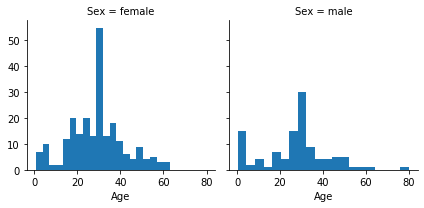

In [706]:
af = sns.FacetGrid(train[train["Survived"] == 1],col = 'Sex')
af.map(plt.hist,'Age',bins = 20)
train["Survived"].value_counts()

# Females are more intended to be saved than males

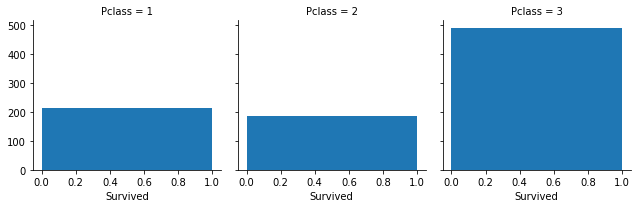

In [707]:
af = sns.FacetGrid(train,col = 'Pclass')
af.map(plt.hist,'Survived',bins = 1)

# The passengers of the third class are more intended to be saved than the other passengers of the other classes

In [708]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [709]:
train2 = train.drop(['PassengerId','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked'],axis = 1)
train2

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
884,0,2
885,1,1
886,0,3
887,1,1


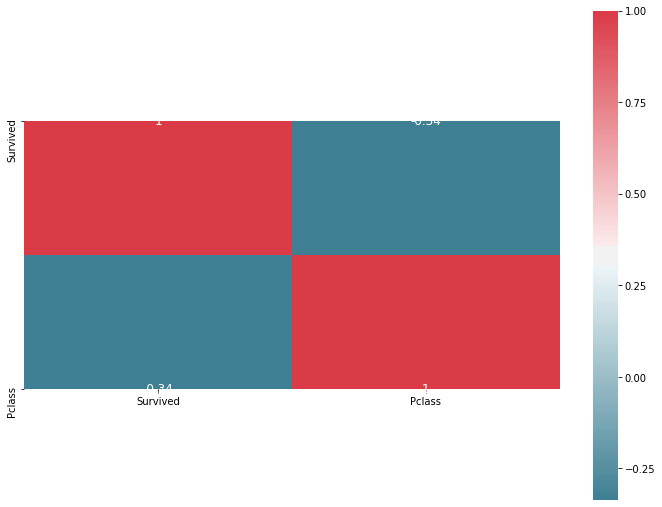

In [710]:
plot_correlation_map(train2)

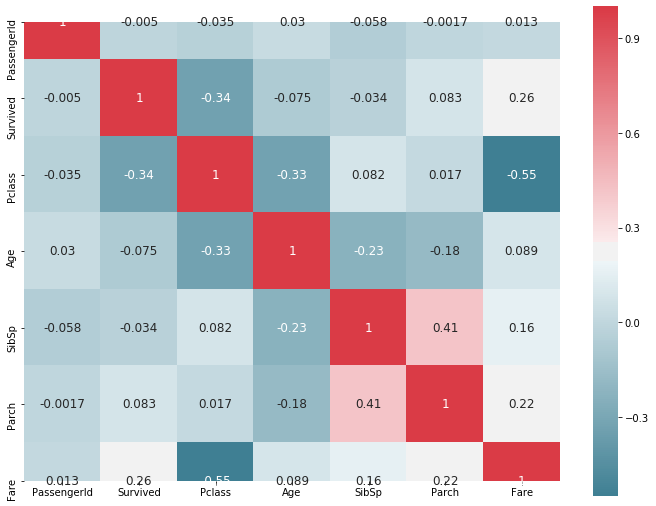

In [723]:
plot_correlation_map(train)

# This Function returns the correlation matrix of the data

In [711]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [712]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [713]:
data = [[] for i in range(len(train))]

for i in range(len(train)):
    st = train["Name"][i]
    match_ob = regex_ob.search(st)
    if match_ob is not None :
        stt = match_ob.group()
        data[i] = stt[:-1]
train["Title"] = data

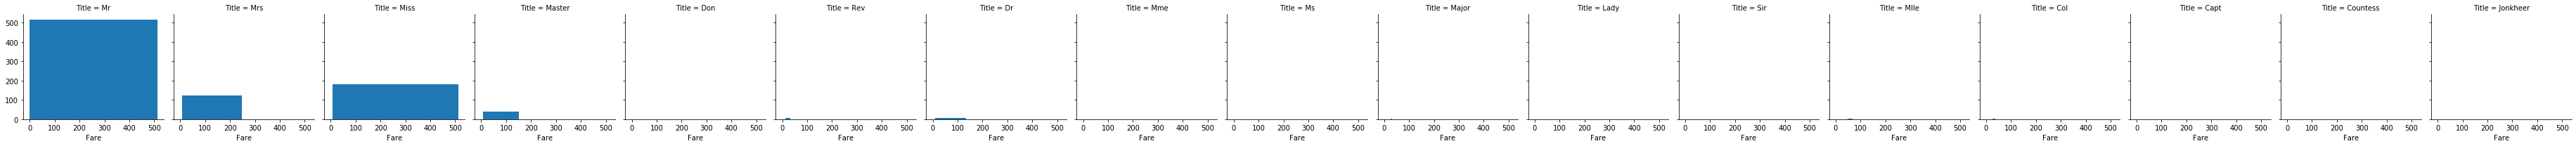

In [714]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Fare',bins = 1)

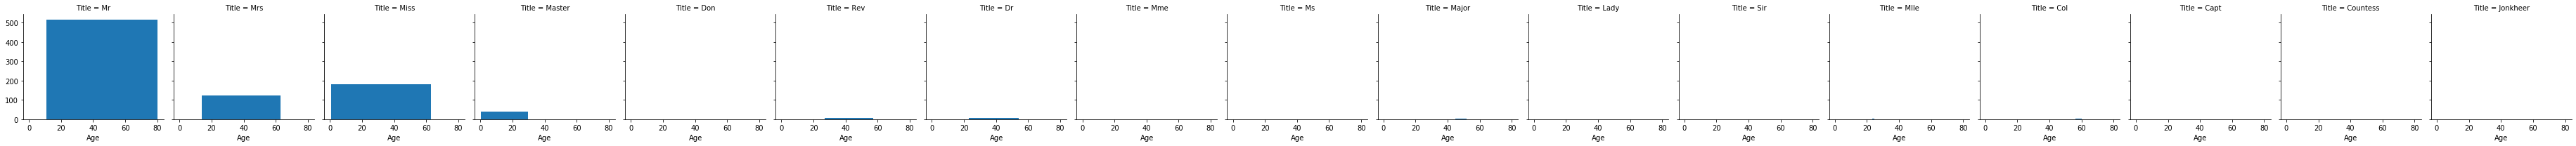

In [716]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Age',bins = 1)

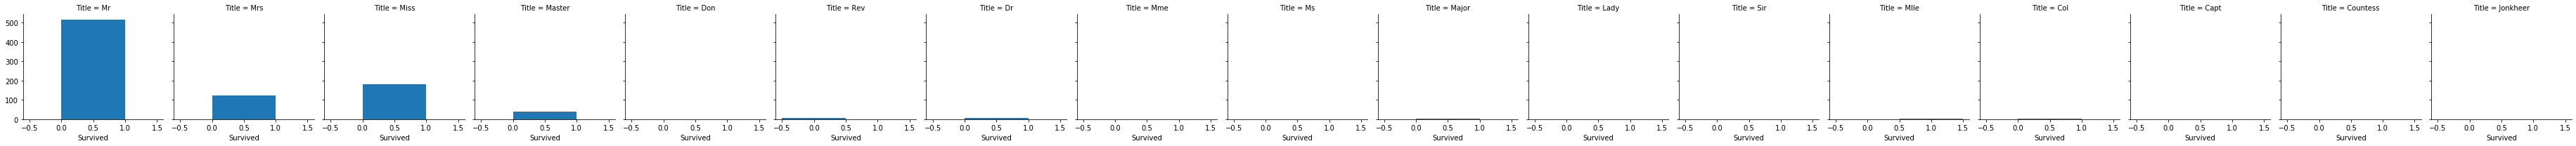

In [717]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Survived',bins = 1)

In [715]:
Title_Dictionary = {

                "Capt":       "Officer",

                "Col":        "Officer",

                "Major":      "Officer",

                "Dr":         "Officer",

                "Rev":        "Officer",

                "Jonkheer":   "Royalty",

                "Don":        "Royalty",

                "Sir" :       "Royalty",

                "Lady" :      "Royalty",

                "the Countess": "Royalty",

                "Dona":       "Royalty",

                "Mme":        "Miss",

                "Mlle":       "Miss",

                "Miss" :      "Miss",

                "Ms":         "Mrs",

                "Mr" :        "Mrs",

                "Mrs" :       "Mrs",

                "Master" :    "Master"

                    }

In [719]:
train["Title"].replace(Title_Dictionary, inplace = True)

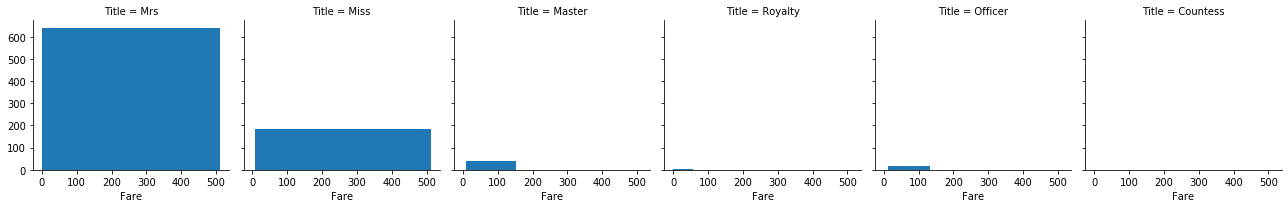

In [720]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Fare',bins = 1)

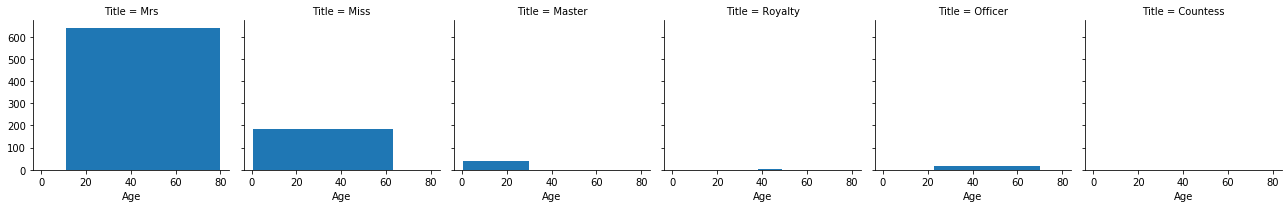

In [721]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Age',bins = 1)

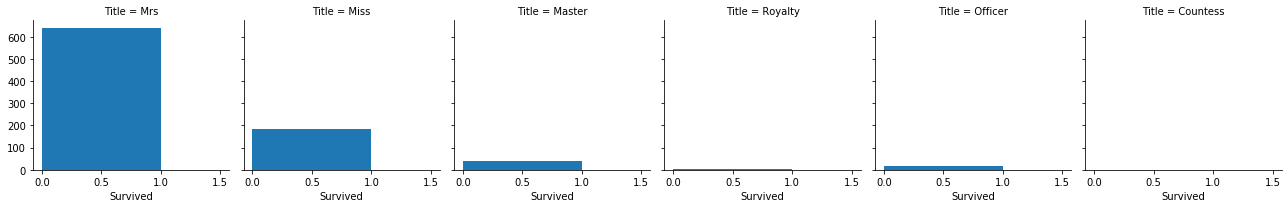

In [722]:
af = sns.FacetGrid(train,col = 'Title')
af.map(plt.hist,'Survived',bins = 1)

# I didnt make the last thing